In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
from IPython.display import Image
import shutil
import os
from random import choice

In [ ]:
!unzip "/content/drive/MyDrive/plant/plantvillage/Leaf500.v1i.yolov5pytorch.zip" -d "/content/drive/MyDrive/plant/plantvillage/yolov5"

Archive:  /content/drive/MyDrive/plant/plantvillage/Leaf500.v1i.yolov5pytorch.zip
 extracting: /content/drive/MyDrive/plant/plantvillage/yolov5/README.dataset.txt  
 extracting: /content/drive/MyDrive/plant/plantvillage/yolov5/README.roboflow.txt  
 extracting: /content/drive/MyDrive/plant/plantvillage/yolov5/data.yaml  
   creating: /content/drive/MyDrive/plant/plantvillage/yolov5/test/
   creating: /content/drive/MyDrive/plant/plantvillage/yolov5/test/images/
 extracting: /content/drive/MyDrive/plant/plantvillage/yolov5/test/images/Pepper__bell___Bacterial_spot-29-_JPG.rf.cd59ca1059937d88316bdebf120c5148.jpg  
 extracting: /content/drive/MyDrive/plant/plantvillage/yolov5/test/images/Pepper__bell___Bacterial_spot-30-_JPG.rf.4bfa6d5cdc410fba701c3965125b6228.jpg  
 extracting: /content/drive/MyDrive/plant/plantvillage/yolov5/test/images/Pepper__bell___Bacterial_spot-39-_JPG.rf.ce4800544176260ac986d07f7d0b5868.jpg  
 extracting: /content/drive/MyDrive/plant/plantvillage/yolov5/test/image

In [ ]:
!unzip "/content/drive/MyDrive/plant/plantvillage/Leaf500.v1i.mt-yolov6.zip" -d "/content/drive/MyDrive/plant/plantvillage/yolov6"

Archive:  /content/drive/MyDrive/plant/plantvillage/Leaf500.v1i.mt-yolov6.zip
 extracting: /content/drive/MyDrive/plant/plantvillage/yolov6/README.dataset.txt  
 extracting: /content/drive/MyDrive/plant/plantvillage/yolov6/README.roboflow.txt  
 extracting: /content/drive/MyDrive/plant/plantvillage/yolov6/data.yaml  
   creating: /content/drive/MyDrive/plant/plantvillage/yolov6/images/
   creating: /content/drive/MyDrive/plant/plantvillage/yolov6/images/test/
 extracting: /content/drive/MyDrive/plant/plantvillage/yolov6/images/test/Pepper__bell___Bacterial_spot-29-_JPG.rf.cd59ca1059937d88316bdebf120c5148.jpg  
 extracting: /content/drive/MyDrive/plant/plantvillage/yolov6/images/test/Pepper__bell___Bacterial_spot-30-_JPG.rf.4bfa6d5cdc410fba701c3965125b6228.jpg  
 extracting: /content/drive/MyDrive/plant/plantvillage/yolov6/images/test/Pepper__bell___Bacterial_spot-39-_JPG.rf.ce4800544176260ac986d07f7d0b5868.jpg  
 extracting: /content/drive/MyDrive/plant/plantvillage/yolov6/images/test/

In [ ]:
!unzip "/content/drive/MyDrive/plant/plantvillage/Leaf500.v1i.yolov7pytorch.zip" -d "/content/drive/MyDrive/plant/plantvillage/yolov7"

Archive:  /content/drive/MyDrive/plant/plantvillage/Leaf500.v1i.yolov7pytorch.zip
 extracting: /content/drive/MyDrive/plant/plantvillage/yolov7/README.dataset.txt  
 extracting: /content/drive/MyDrive/plant/plantvillage/yolov7/README.roboflow.txt  
 extracting: /content/drive/MyDrive/plant/plantvillage/yolov7/data.yaml  
   creating: /content/drive/MyDrive/plant/plantvillage/yolov7/test/
   creating: /content/drive/MyDrive/plant/plantvillage/yolov7/test/images/
 extracting: /content/drive/MyDrive/plant/plantvillage/yolov7/test/images/Pepper__bell___Bacterial_spot-29-_JPG.rf.cd59ca1059937d88316bdebf120c5148.jpg  
 extracting: /content/drive/MyDrive/plant/plantvillage/yolov7/test/images/Pepper__bell___Bacterial_spot-30-_JPG.rf.4bfa6d5cdc410fba701c3965125b6228.jpg  
 extracting: /content/drive/MyDrive/plant/plantvillage/yolov7/test/images/Pepper__bell___Bacterial_spot-39-_JPG.rf.ce4800544176260ac986d07f7d0b5868.jpg  
 extracting: /content/drive/MyDrive/plant/plantvillage/yolov7/test/image

# **YoloV5**

In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16408, done.
remote: Total 16408 (delta 0), reused 0 (delta 0), pack-reused 16408
Receiving objects: 100% (16408/16408), 14.96 MiB | 23.93 MiB/s, done.
Resolving deltas: 100% (11263/11263), done.


In [4]:
%cd /content/yolov5/

/content/yolov5


In [5]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.3/709.3 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.5 MB/s eta 0:00:00


In [7]:
with open(r'/content/drive/MyDrive/plant/plantvillage/yolov7/data.yaml', 'r') as file:
    lines = file.readlines()
    print(lines)

['train: /content/drive/MyDrive/plant/plantvillage/yolov7/train/images\n', 'val: /content/drive/MyDrive/plant/plantvillage/yolov7/valid/images\n', '\n', '\n', 'nc: 15\n', "names: ['Pepper_bell_bacterial_spot', 'Pepper_bell_healthy', 'Potato_early_blight', 'Potato_healthy', 'Potato_late_blight', 'Tomato_bacterial_spot', 'Tomato_early_blight', 'Tomato_healthy', 'Tomato_late_blight', 'Tomato_leaf-mold', 'Tomato_mosaic virus', 'Tomato_septoria_leaf_spot', 'Tomato_spider_mites', 'Tomato_target_spot', 'Tomato_yellowleaf_curl_virus']\n", '\n', 'roboflow:\n', '  workspace: dataset-aq7x0\n', '  project: leaf500\n', '  version: 1\n', '  license: CC BY 4.0\n', '  url: https://universe.roboflow.com/dataset-aq7x0/leaf500/dataset/1']


In [8]:
!wandb disabled
!python train.py --img 415 --epochs 50 --data /content/drive/MyDrive/plant/plantvillage/yolov5/data.yaml --weights yolov5x6.pt --cache --workers 2

/bin/bash: line 1: wandb: command not found
2024-02-03 10:13:53.043490: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-03 10:13:53.043543: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-03 10:13:53.046089: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5x6.pt, cfg=, data=/content/drive/MyDrive/plant/plantvillage/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None,

In [1]:
p = 66.3
r = 60.9
mAP50 = 60.5

In [9]:
!zip -r /content/drive/MyDrive/plant/file_plantvillage.zip /content/yolov5

  adding: content/yolov5/ (stored 0%)
  adding: content/yolov5/.gitattributes (deflated 4%)
  adding: content/yolov5/CONTRIBUTING.md (deflated 57%)
  adding: content/yolov5/data/ (stored 0%)
  adding: content/yolov5/data/ImageNet100.yaml (deflated 48%)
  adding: content/yolov5/data/coco128-seg.yaml (deflated 47%)
  adding: content/yolov5/data/coco.yaml (deflated 49%)
  adding: content/yolov5/data/SKU-110K.yaml (deflated 52%)
  adding: content/yolov5/data/coco128.yaml (deflated 47%)
  adding: content/yolov5/data/ImageNet.yaml (deflated 54%)
  adding: content/yolov5/data/VisDrone.yaml (deflated 58%)
  adding: content/yolov5/data/Objects365.yaml (deflated 53%)
  adding: content/yolov5/data/Argoverse.yaml (deflated 55%)
  adding: content/yolov5/data/ImageNet10.yaml (deflated 42%)
  adding: content/yolov5/data/hyps/ (stored 0%)
  adding: content/yolov5/data/hyps/hyp.scratch-high.yaml (deflated 53%)
  adding: content/yolov5/data/hyps/hyp.scratch-med.yaml (deflated 53%)
  adding: content/yolo

**YoloV6**

In [10]:
%cd ..

/content


In [11]:
!git clone https://github.com/meituan/YOLOv6.git

Cloning into 'YOLOv6'...
remote: Enumerating objects: 3834, done.
remote: Counting objects: 100% (1714/1714), done.
remote: Compressing objects: 100% (328/328), done.
remote: Total 3834 (delta 1507), reused 1400 (delta 1386), pack-reused 2120
Receiving objects: 100% (3834/3834), 47.12 MiB | 30.99 MiB/s, done.
Resolving deltas: 100% (2339/2339), done.


In [12]:
%cd /content/YOLOv6

/content/YOLOv6


In [13]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 65.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [14]:
!python tools/train.py --batch 4 --epochs 50 --conf configs/yolov6s_finetune.py --data /content/drive/MyDrive/plant/plantvillage/yolov6/data.yaml --fuse_ab --device 0

2024-02-03 10:39:03.952332: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-03 10:39:03.952381: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-03 10:39:03.953883: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-03 10:39:03.961356: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-03 10:39:05.802525: W tensorflow/compiler/tf2

In [2]:
p1 = 23.1
r1 = 49.4
mAP501 = 44.9

**YoloV7**

In [15]:
%cd ..

/content


In [16]:
!git clone https://github.com/WongKinYiu/yolov7.git

Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197
Receiving objects: 100% (1197/1197), 74.23 MiB | 27.97 MiB/s, done.
Resolving deltas: 100% (520/520), done.


In [17]:
%cd /content/yolov7/

/content/yolov7


In [18]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.3
    Uninstalling numpy-1.26.3:
      Successfully uninstalled numpy-1.26.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [19]:
!python train.py  --weights yolov7.pt --epochs 50 --data "/content/drive/MyDrive/plant/plantvillage/yolov7/data.yaml" --workers 4 --batch-size 4 --img 416 --cfg cfg/training/yolov7.yaml --name yolov7 --hyp data/hyp.scratch.p5.yaml

2024-02-03 11:10:05.799431: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-03 11:10:05.799489: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-03 11:10:05.803492: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-03 11:10:05.815580: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-03 11:10:07.576400: W tensorflow/compiler/tf2

In [3]:

p2 =   35.2
r2 = 47.7
mAP502 = 35.2

**YoloV8**

In [3]:
%cd ..

/


In [4]:
%cd /content/

/content


In [5]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.3/709.3 kB 10.3 MB/s eta 0:00:00


In [6]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")

results = model.train(data="/content/drive/MyDrive/plant/plantvillage/yolov5/data.yaml", epochs=30, imgsz=416)

100%|██████████| 6.23M/6.23M [00:00<00:00, 126MB/s]


Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/plant/plantvillage/yolov5/data.yaml, epochs=30, time=None, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fals

100%|██████████| 755k/755k [00:00<00:00, 43.0MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/drive/MyDrive/plant/plantvillage/yolov5/train/labels... 413 images, 0 backgrounds, 0 corrupt: 100%|██████████| 413/413 [02:27<00:00,  2.80it/s]


train: New cache created: /content/drive/MyDrive/plant/plantvillage/yolov5/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/plant/plantvillage/yolov5/valid/labels... 118 images, 0 backgrounds, 0 corrupt: 100%|██████████| 118/118 [00:41<00:00,  2.81it/s]

val: New cache created: /content/drive/MyDrive/plant/plantvillage/yolov5/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      1.38G      2.464       4.63      2.095         69        416: 100%|██████████| 26/26 [00:14<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]

                   all        118        454    0.00852     0.0933     0.0116    0.00283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      1.38G       2.34      4.204      1.786         74        416: 100%|██████████| 26/26 [00:10<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]

                   all        118        454     0.0206      0.478     0.0958     0.0404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      1.38G      2.286      3.583       1.66         76        416: 100%|██████████| 26/26 [00:09<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        118        454      0.479     0.0735      0.167     0.0724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      1.38G      2.201      3.287      1.664        124        416: 100%|██████████| 26/26 [00:07<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]


                   all        118        454      0.298      0.259       0.18     0.0696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      1.38G      2.243      3.119      1.636         60        416: 100%|██████████| 26/26 [00:07<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]

                   all        118        454      0.239      0.268      0.164     0.0673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      1.38G      2.212      3.044      1.616         46        416: 100%|██████████| 26/26 [00:09<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        118        454      0.353      0.249      0.235      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      1.38G      2.183      2.832      1.579        108        416: 100%|██████████| 26/26 [00:09<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        118        454      0.336      0.377      0.272      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      1.38G       2.16      2.794      1.581         74        416: 100%|██████████| 26/26 [00:09<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all        118        454      0.526      0.235      0.273      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      1.38G      2.097      2.722      1.575         76        416: 100%|██████████| 26/26 [00:08<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all        118        454       0.31      0.302      0.274      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      1.38G       2.12       2.63      1.591         47        416: 100%|██████████| 26/26 [00:07<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]


                   all        118        454      0.378      0.342      0.309      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      1.38G      2.097      2.566      1.549         52        416: 100%|██████████| 26/26 [00:07<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]

                   all        118        454      0.605      0.247      0.308      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      1.38G      2.144      2.531      1.584         70        416: 100%|██████████| 26/26 [00:09<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        118        454      0.449      0.376      0.369      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      1.38G      2.074      2.417      1.555         70        416: 100%|██████████| 26/26 [00:09<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]

                   all        118        454      0.671      0.369      0.422       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      1.38G       2.06      2.303       1.55         61        416: 100%|██████████| 26/26 [00:09<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all        118        454      0.749      0.387      0.435       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      1.38G      2.055      2.378      1.542         87        416: 100%|██████████| 26/26 [00:09<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]

                   all        118        454       0.73      0.312      0.414      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      1.38G      2.037      2.366      1.532         77        416: 100%|██████████| 26/26 [00:07<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]

                   all        118        454      0.566      0.357      0.428      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      1.38G      2.009      2.234      1.544         69        416: 100%|██████████| 26/26 [00:07<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        118        454      0.537      0.376      0.427      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      1.38G      2.014      2.221      1.526         60        416: 100%|██████████| 26/26 [00:09<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        118        454      0.561      0.415      0.473      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      1.38G      2.009      2.126      1.522         49        416: 100%|██████████| 26/26 [00:09<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        118        454      0.502      0.427      0.465      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      1.38G      2.048      2.197      1.532         77        416: 100%|██████████| 26/26 [00:09<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]

                   all        118        454      0.449      0.502      0.469       0.22


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      1.38G      1.996      2.268      1.579         51        416: 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all        118        454       0.53      0.392      0.444      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      1.38G      1.986      2.195       1.61         64        416: 100%|██████████| 26/26 [00:08<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        118        454      0.532      0.465      0.484      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      1.38G      1.949      2.171      1.585         37        416: 100%|██████████| 26/26 [00:07<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]


                   all        118        454      0.453      0.505      0.513      0.233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      1.38G       1.96      2.095      1.611         51        416: 100%|██████████| 26/26 [00:07<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        118        454      0.626      0.461      0.515      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      1.39G      1.923      2.043      1.585         36        416: 100%|██████████| 26/26 [00:08<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all        118        454       0.54      0.499      0.534       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      1.38G      1.915      1.978      1.556         32        416: 100%|██████████| 26/26 [00:08<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]

                   all        118        454      0.528      0.499      0.531      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      1.38G      1.922      2.014      1.568         47        416: 100%|██████████| 26/26 [00:08<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        118        454      0.568      0.495      0.536      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      1.38G      1.869      1.983      1.554         62        416: 100%|██████████| 26/26 [00:07<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]

                   all        118        454      0.574      0.516      0.539      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      1.39G      1.871       1.97      1.529         41        416: 100%|██████████| 26/26 [00:07<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        118        454      0.591      0.523      0.548      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      1.38G       1.86      1.916      1.533         49        416: 100%|██████████| 26/26 [00:08<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]

                   all        118        454      0.551      0.559      0.548      0.244



30 epochs completed in 0.101 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.08s/it]


                   all        118        454       0.58      0.519      0.546      0.247
Pepper_bell_bacterial_spot        118         39      0.362      0.385       0.34      0.102
   Pepper_bell_healthy        118          7      0.874      0.857      0.978      0.421
   Potato_early_blight        118         97      0.538      0.649      0.579       0.19
        Potato_healthy        118          6      0.784          1      0.948      0.573
    Potato_late_blight        118         21      0.511      0.449      0.463      0.213
 Tomato_bacterial_spot        118         92      0.416     0.0326       0.24       0.08
   Tomato_early_blight        118         23      0.372      0.261      0.207     0.0697
        Tomato_healthy        118          7      0.619          1      0.978      0.636
    Tomato_late_blight        118         11      0.566      0.545      0.499       0.14
      Tomato_leaf-mold        118         19      0.303      0.105      0.184      0.057
   Tomato_mosaic 

In [4]:
p3 = 58.0
r3 = 51.9
mAP503 = 54.6

**Comparison**

In [5]:
score = [mAP50,mAP501,mAP502,mAP503]
score1 = [p,p1,p2,p3]
score2 = [r,r1,r2,r3]

In [6]:
import numpy as np

classifier = ('YoloV5','YoloV6','YoloV7','YoloV8')
y_pos = np.arange(len(classifier))

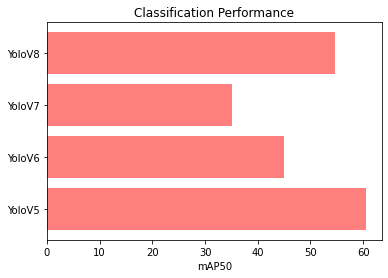

In [8]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('mAP50')
plt2.title('Classification Performance')
plt2.show()

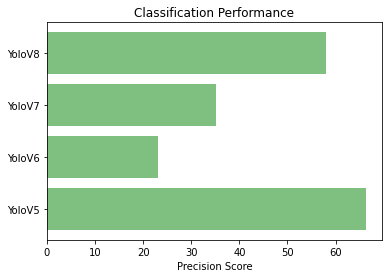

In [9]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score1, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

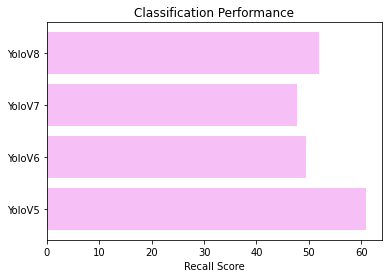

In [10]:
plt2.barh(y_pos, score2, align='center', alpha=0.5,color='violet')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()